### Init

In [3]:
from fastcore.all import *
from fastai.vision.all import *

epoch,train_loss,valid_loss,error_rate,time
0,2.066026,1.224560,0.418348,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.950376,0.533653,0.180596,01:21
1,0.291963,0.336337,0.112392,01:21


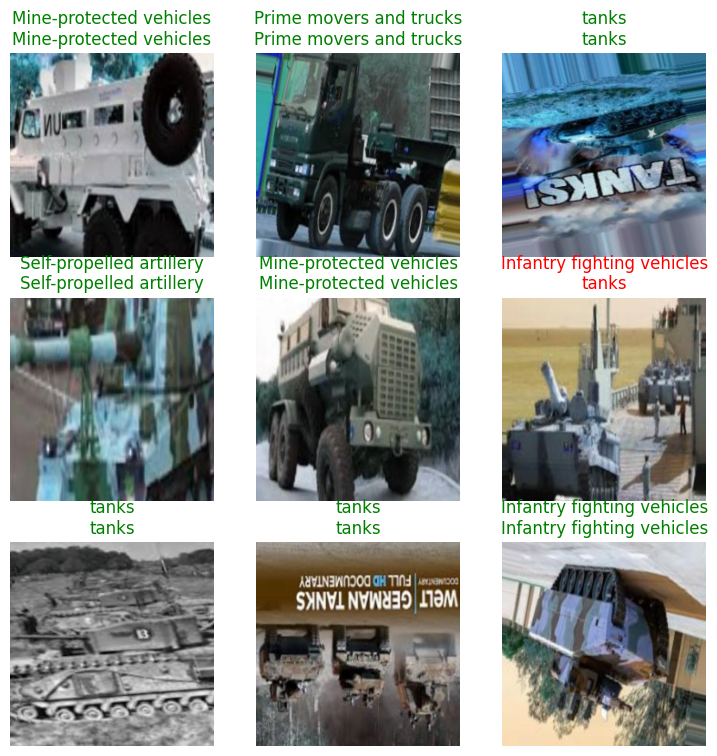

In [ ]:


path = Path('./military_vehicles/train')

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path, recurse=True), valid_pct=0.2, seed=42,
    label_func = lambda p: p.split('_')[0], item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2) 
learn.show_results()

In [ ]:
# ...existing code...
# This script will be a new cell in your test notebook: 01_intro_practice/test_01_intro_practice.ipynb

from fastai.vision.all import *
from pathlib import Path

# Load the trained model
# Assumes the .pkl file is in the same directory as the notebook
learn = load_learner('military_vehicle_classifier_mk1.pkl')

# --- Define the single category you want to test ---
classes = ['Anti-aircraft', 'Armored combat support vehicles', 'Armored personnel carriers', 'Infantry fighting vehicles', 'Light armored vehicles',
'Mine-protected vehicles', 'Prime movers and trucks', 'Self-propelled artillery',
'tanks']

category_to_test = classes[7] # tanks
# ----------------------------------------------------

tests_path = Path('./military_vehicles/test')
class_path = tests_path/category_to_test

print(f"Evaluating model performance for category: '{category_to_test}'\n")

# Check if the directory exists
if not class_path.exists():
    print(f"Directory for '{category_to_test}' not found.")
else:
    # Get all image files in the class directory
    image_files = get_image_files(class_path)
    num_images_in_class = len(image_files)
    
    if num_images_in_class == 0:
        print(f"No images found for '{category_to_test}'.")
    else:
        # Initialize a counter for correct predictions
        class_correct_count = 0
        
        # Iterate over each image and make a prediction
        for img_file in image_files:
            pred_class, _, _ = learn.predict(img_file)
            
            # Check if the prediction is correct
            if pred_class == category_to_test:
                class_correct_count += 1
                
        # Calculate and print the accuracy for the category
        accuracy = (class_correct_count / num_images_in_class) * 100
        print(f"Results for '{category_to_test}':")
        print(f"Correctly identified: {class_correct_count}/{num_images_in_class}")
        print(f"Accuracy: {accuracy:.2f}%")
# ...existing code...

In [ ]:
learn.export('military_vehicle_classifier_mk1.pkl')